# 验证旋度的基本定理

首先还是给出一个无旋场，验证旋度基本定理

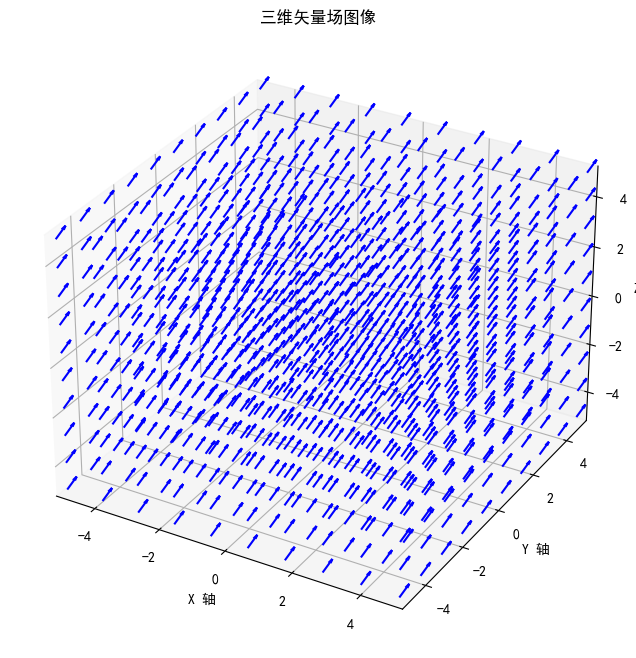

矢量场是
N.i + 2*N.j + 3*N.k
矢量场的旋度 (∇×A):
0


In [26]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from matplotlib import rcParams
# 设置字体，防止中文乱码
rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体
rcParams['axes.unicode_minus'] = False    # 解决负号无法正常显示的问题

# 创建 3D 网格点
x = np.linspace(-5, 5, 10)
y = np.linspace(-5, 5, 10)
z = np.linspace(-5, 5, 10)
X, Y, Z = np.meshgrid(x, y, z)

# 定义 3D 矢量场的分量
A_x = np.ones_like(X) * 1
A_y = np.ones_like(X) * 2
A_z = np.ones_like(X) * 3

# 绘制 3D 矢量场
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.quiver(X, Y, Z, A_x, A_y, A_z, length=0.5, normalize=True, color='b')

ax.set_xlim([-5, 5])
ax.set_ylim([-5, 5])
ax.set_zlim([-5, 5])
ax.set_xlabel('X 轴')
ax.set_ylabel('Y 轴')
ax.set_zlabel('Z 轴')
ax.set_title('三维矢量场图像')
plt.show()

import sympy as sp
from sympy.vector import CoordSys3D, Del

# 定义 nabla 算子
delop = Del()

# 创建一个三维坐标系
N = CoordSys3D('N')
x, y, z = N.x, N.y, N.z

# 定义矢量场 A
A = 1 * N.i + 2 * N.j + 3 * N.k

# 计算矢量场的散度
curl_A = sp.simplify(sp.expand(delop ^ A))

print('矢量场是')
print(A)
# 输出散度
print("矢量场的旋度 (∇×A):")
print( (sp.simplify(sp.expand(curl_A))))

In [22]:
# 计算矢量场沿着圆周线的线积分
# 定义路径参数化
t = sp.symbols('t')
x_t = 5 * sp.cos(t)
y_t = 5 * sp.sin(t)
z_t = 0  # 在平面上的路径

# 将路径参数化代入梯度场
A_along_path = A.subs({x: x_t, y: y_t, z: z_t})
print('路径上的矢量场')
print(A_along_path)

# 计算路径的微分元素 dr/dt
dx_dt = sp.diff(x_t, t)
dy_dt = sp.diff(y_t, t)
dz_dt = sp.diff(z_t, t)

# 微分向量 dl
dl = dx_dt * N.i + dy_dt * N.j + dz_dt * N.k

print('路径上的微元：')
print(dl)

# 计算梯度场与路径微分 dr 的点积
integrand = A_along_path.dot(dl)
print('最后的被积函数的形式：')
print(integrand)

# 计算线积分 ∫∇f · dr，积分范围 t ∈ [0, π]
line_integral_symbolic = sp.simplify(sp.integrate(integrand, (t, 0, 2*  sp.pi)))

# 输出符号线积分结果
print("\n符号线积分结果:")
sp.pprint(line_integral_symbolic)

# 计算具体数值
line_integral_numeric = line_integral_symbolic.evalf(chop=True)

print("\n线积分的数值结果:")
print(line_integral_numeric)

路径上的矢量场
N.i + 2*N.j + 3*N.k
路径上的微元：
(-5*sin(t))*N.i + (5*cos(t))*N.j
最后的被积函数的形式：
-5*sin(t) + 10*cos(t)

符号线积分结果:
0

线积分的数值结果:
0


In [27]:
# 计算矢量场旋度在周线所围曲面上的面积分
rho = 5
# 将直角坐标转换为球坐标
r, theta, phi = sp.symbols('r theta phi')
# 面积微分元素为 R^2  sin\theta d\theta d\phi
# area_element = rho / np.sqrt(rho ** 2 - (x - cx) ** 2 - (y - cy)**2)
area_element = r ** 2 * sp.sin(theta)
print('面积微分元素为：')
print(area_element)
rhat = N.i


# 在球坐标中表示向量场
curl = curl_A.subs({x: rho * sp.sin(theta) * sp.cos(phi), y: rho * sp.sin(theta) * sp.sin(phi), z: rho * sp.cos(theta)})
print('面积微元处场的代表向量为：')
print(A_polar)

# 计算单位圆内的面积分，theta 的范围是 0 到 pi，phi 的范围是 0 到 2pi
area_integral = sp.integrate(area_element * (curl & rhat) , (r, 0, rho), (theta, 0, 2 * sp.pi))

# 输出面积分结果
print("面积分结果:")
sp.pprint(area_integral)

面积微分元素为：
r**2*sin(theta)
面积微元处场的代表向量为：
N.i + 2*N.j + 3*N.k
面积分结果:
0


再给一个有旋的场，验证旋度的基本定理

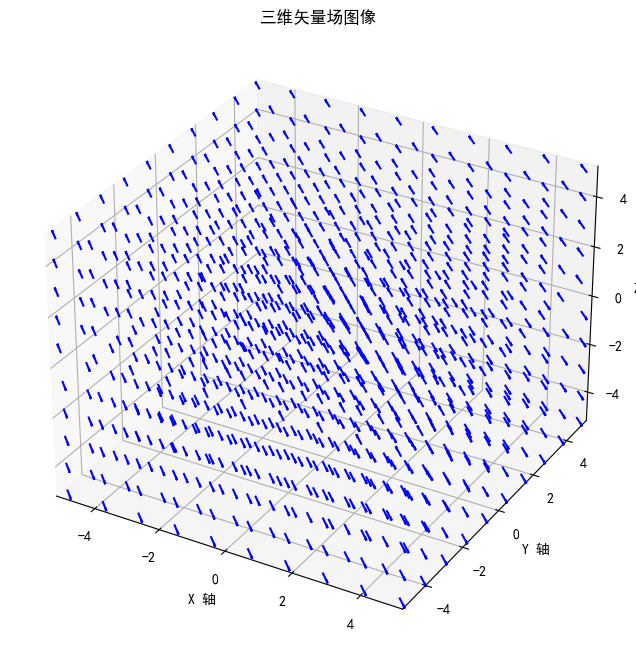

矢量场是
(-N.y)*N.i + N.x*N.j
矢量场的旋度 (∇×A):
2*N.k


In [33]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from matplotlib import rcParams
# 设置字体，防止中文乱码
rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体
rcParams['axes.unicode_minus'] = False    # 解决负号无法正常显示的问题

# 创建 3D 网格点
x = np.linspace(-5, 5, 10)
y = np.linspace(-5, 5, 10)
z = np.linspace(-5, 5, 10)
X, Y, Z = np.meshgrid(x, y, z)

# 定义 3D 矢量场的分量
A_x = -x
A_y = y
A_z = np.zeros_like(X)

# 绘制 3D 矢量场
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.quiver(X, Y, Z, A_x, A_y, A_z, length=0.5, normalize=True, color='b')

ax.set_xlim([-5, 5])
ax.set_ylim([-5, 5])
ax.set_zlim([-5, 5])
ax.set_xlabel('X 轴')
ax.set_ylabel('Y 轴')
ax.set_zlabel('Z 轴')
ax.set_title('三维矢量场图像')
plt.show()

import sympy as sp
from sympy.vector import CoordSys3D, Del

# 定义 nabla 算子
delop = Del()

# 创建一个三维坐标系
N = CoordSys3D('N')
x, y, z = N.x, N.y, N.z

# 定义矢量场 A
A = (-y) * N.i + x * N.j + 0 * N.k

# 计算矢量场的旋度
curl_A = sp.simplify(sp.expand(delop ^ A))

print('矢量场是')
print(A)
# 输出散度
print("矢量场的旋度 (∇×A):")
print( curl_A)

In [34]:
# 计算矢量场沿着圆周线的线积分
# 定义路径参数化
t = sp.symbols('t')
x_t = 5 * sp.cos(t)
y_t = 5 * sp.sin(t)
z_t = 0  # 在平面上的路径

# 将路径参数化代入梯度场
A_along_path = A.subs({x: x_t, y: y_t, z: z_t})
print('路径上的矢量场')
print(A_along_path)

# 计算路径的微分元素 dr/dt
dx_dt = sp.diff(x_t, t)
dy_dt = sp.diff(y_t, t)
dz_dt = sp.diff(z_t, t)

# 微分向量 dl
dl = dx_dt * N.i + dy_dt * N.j + dz_dt * N.k

print('路径上的微元：')
print(dl)

# 计算梯度场与路径微分 dr 的点积
integrand = A_along_path.dot(dl)
print('最后的被积函数的形式：')
print(integrand)

# 计算线积分 ∫∇f · dr，积分范围 t ∈ [0, π]
line_integral_symbolic = sp.simplify(sp.integrate(integrand, (t, 0, 2*  sp.pi)))

# 输出符号线积分结果
print("\n符号线积分结果:")
sp.pprint(line_integral_symbolic)

# 计算具体数值
line_integral_numeric = line_integral_symbolic.evalf(chop=True)

print("\n线积分的数值结果:")
print(line_integral_numeric)

路径上的矢量场
(-5*sin(t))*N.i + (5*cos(t))*N.j
路径上的微元：
(-5*sin(t))*N.i + (5*cos(t))*N.j
最后的被积函数的形式：
25*sin(t)**2 + 25*cos(t)**2

符号线积分结果:
50⋅π

线积分的数值结果:
157.079632679490


In [44]:
# 计算矢量场旋度在周线所围曲面上的面积分
rho = 5
# 将直角坐标转换为球坐标
r, theta, phi = sp.symbols('r theta phi')
# 面积微分元素为 R^2  sin\theta d\theta d\phi
# area_element = rho / np.sqrt(rho ** 2 - (x - cx) ** 2 - (y - cy)**2)
area_element = r  
print('面积微分元素为：')
print(area_element)
rhat = N.k

# 在球坐标中表示向量场
curl = curl_A.subs({x: r * sp.sin(theta) * sp.cos(phi), y: r * sp.sin(theta) * sp.sin(phi), z: r * sp.cos(theta)})
print('面积微元处场的代表向量为：')
print(curl)

# 计算单位圆内的面积分，theta 的范围是 0 到 pi，phi 的范围是 0 到 2pi
area_integral = sp.integrate(area_element * (curl & rhat) , (r, 0, rho), (phi, 0, 2 * sp.pi))

# 输出面积分结果
print("面积分结果:")
sp.pprint(area_integral)

面积微分元素为：
r
面积微元处场的代表向量为：
2*N.k
面积分结果:
50⋅π
